In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
#candy data by Minyeong Han
df1 = pd.read_csv("https://raw.github.com/mhan1/DAV-5400/master/candy_data.csv") 

#student test data by Natan
df2 = pd.read_csv('https://raw.githubusercontent.com/mhan1/DAV-5400/master/student_test.csv')

#student enrollment data by Qi Sun
df3 = pd.read_csv('https://raw.githubusercontent.com/mhan1/DAV-5400/master/student_enrollment.csv')

## 1. Candy data analysis

In [54]:
df1

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | Black Jacks,Q6 | Coffee Crisp,Q6 | Dove Bars,Q6 | Fuzzy Peaches,Q6 | Glow sticks,Q6 | Gummy Bears
0,90272865,No,Male,56,Canada,Quebec,MEH,JOY,DESPAIR,DESPAIR,MEH,NaN
1,90272866,No,Male,64,US,NY,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH
2,90272867,Yes,Male,43,Murica,California,MEH,MEH,JOY,JOY,JOY,DESPAIR
3,90272868,No,Female,37,Canada,Ontario,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR
4,90272878,No,Male,64,USA,Texas,MEH,MEH,JOY,MEH,JOY,JOY
5,90272880,No,I'd rather not say,59,USA,NEW YORK,JOY,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
6,90272881,No,Male,48,US,CO,MEH,MEH,JOY,MEH,DESPAIR,MEH


In [55]:
#changing the column names to simplify
df1.columns = ['ID', 'Trick or treat', 'Gender', 'Age', 'Country', 'Region', 
               'Black Jacks', 'Coffee Crisp', 'Dove Bars',
               'Fuzzy Peaches', 'Glow Sticks', 'Gummy Bears']

In [56]:
#tidyng the dataframe, by making the wide format into long format.
tidy_df1 = df1.melt(id_vars = ['ID', 'Trick or treat', 'Age', 'Country', 'Region', 'Gender'], 
                    value_vars = ['Black Jacks', 'Coffee Crisp', 'Dove Bars', 'Fuzzy Peaches', 
                                  'Glow Sticks', 'Gummy Bears'])

In [57]:
#renaming the 'variable' column into 'Candy'.
tidy_df1.rename(columns={'variable':'Candy'}, inplace = True)

In [58]:
#sanity check
tidy_df1.head()

,ID,Trick or treat,Age,Country,Region,Gender,Candy,value
0,90272865,No,56,Canada,Quebec,Male,Black Jacks,MEH
1,90272866,No,64,US,NY,Male,Black Jacks,MEH
2,90272867,Yes,43,Murica,California,Male,Black Jacks,MEH
3,90272868,No,37,Canada,Ontario,Female,Black Jacks,MEH
4,90272878,No,64,USA,Texas,Male,Black Jacks,MEH


In [59]:
#checking the data type.
tidy_df1.dtypes

ID                 int64
Trick or treat    object
Age                int64
Country           object
Region            object
Gender            object
Candy             object
value             object
dtype: object

In [60]:
# converting the 'value' column data type from string to numeric, after replacing into respective number for calculation. 
tidy_df1['value'].replace({'DESPAIR':1, 'MEH':2, 'JOY':3}, inplace = True)
tidy_df1['value'] = pd.to_numeric(tidy_df1['value'])

In [61]:
#sanity check
tidy_df1.head()

,ID,Trick or treat,Age,Country,Region,Gender,Candy,value
0,90272865,No,56,Canada,Quebec,Male,Black Jacks,2.0
1,90272866,No,64,US,NY,Male,Black Jacks,2.0
2,90272867,Yes,43,Murica,California,Male,Black Jacks,2.0
3,90272868,No,37,Canada,Ontario,Female,Black Jacks,2.0
4,90272878,No,64,USA,Texas,Male,Black Jacks,2.0


In [62]:
#checking the data type
tidy_df1.dtypes

ID                  int64
Trick or treat     object
Age                 int64
Country            object
Region             object
Gender             object
Candy              object
value             float64
dtype: object

In [63]:
#grouping by 'Candy' and calculating the mean of 'value' column, and then sorting.
h_candy = pd.DataFrame(tidy_df1.groupby(['Candy'])['value'].agg('mean').sort_values(ascending=False))

#renaming the column name into 'hierarchy'.
h_candy.rename(columns={'value':'hierarchy'}, inplace=True) 
h_candy

,hierarchy
Candy,
Dove Bars,2.428571
Coffee Crisp,2.285714
Black Jacks,2.142857
Fuzzy Peaches,1.857143
Glow Sticks,1.714286
Gummy Bears,1.666667


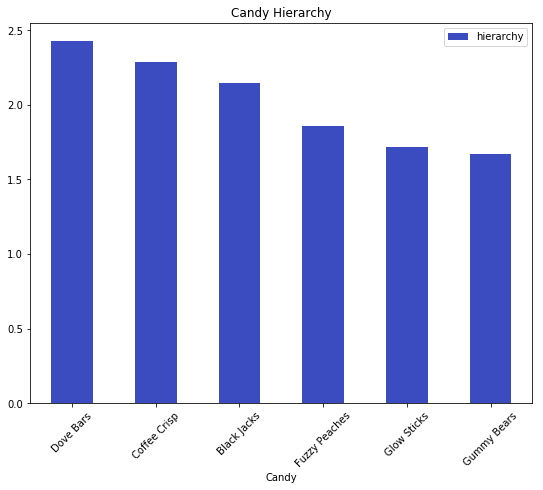

In [64]:
#visualizing the above table.
h_candy.plot(title='Candy Hierarchy', colormap='coolwarm',
             figsize=(9,7), rot=45,  
             kind='bar');

- Among the survey participants, "Dove Bars" is the most favored candy. I calculated the mean of "values" which were given by the survey participants - Joy', 'Meh', 'Despair' and converted into respective number for mathematic calculation. 'Joy' was converted into the highest score 3, 'Despair' was converted into the lowest score 1. I used the highest mean value as an indicator of the most favored candy.

In [65]:
#grouping by 'Gender' and 'Candy', and then calculating the mean of 'value' column.
gender_candy = tidy_df1.groupby(['Gender', 'Candy'])['value'].agg([('Average Value', 'mean')])
gender_candy

Average Value
Gender             Candy                       
Female             Black Jacks              2.0
                   Coffee Crisp             3.0
                   Dove Bars                2.0
                   Fuzzy Peaches            3.0
                   Glow Sticks              1.0
                   Gummy Bears              1.0
I'd rather not say Black Jacks              3.0
                   Coffee Crisp             3.0
                   Dove Bars                3.0
                   Fuzzy Peaches            1.0
                   Glow Sticks              1.0
                   Gummy Bears              1.0
Male               Black Jacks              2.0
                   Coffee Crisp             2.0
                   Dove Bars                2.4
                   Fuzzy Peaches            1.8
                   Glow Sticks              2.0
                   Gummy Bears              2.0

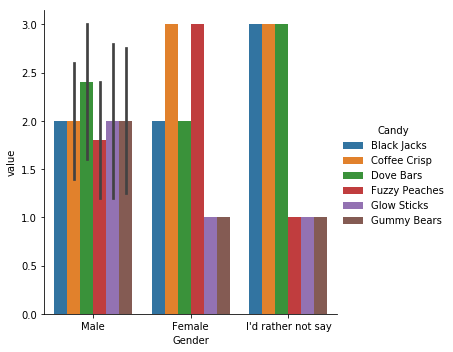

In [66]:
#visualizing the above table. I am using the tidy_df1 data frame, so that I can get the Confidence Interval.
sns.catplot(data=tidy_df1, x='Gender', y='value', hue='Candy', kind='bar');

- Among male participants, "Dove Bars" is the most favored candy, among female participants, "Coffe Crisp" and "Fuzzy Peaches" are the most favored candy, and among the participants who responded "I'd rather not say", "Black Jacks", "Coffe Crisp", "Dove Bars" are equally the most favored candies. 

In [67]:
#grouping by 'Age' and 'Candy', and then calculating the mean of 'value' column.
age_candy = tidy_df1.groupby(['Age','Candy'])['value'].agg([('Average Value', 'mean')])
age_candy

Average Value
Age Candy                       
37  Black Jacks              2.0
    Coffee Crisp             3.0
    Dove Bars                2.0
    Fuzzy Peaches            3.0
    Glow Sticks              1.0
    Gummy Bears              1.0
43  Black Jacks              2.0
    Coffee Crisp             2.0
    Dove Bars                3.0
    Fuzzy Peaches            3.0
    Glow Sticks              3.0
    Gummy Bears              1.0
48  Black Jacks              2.0
    Coffee Crisp             2.0
    Dove Bars                3.0
    Fuzzy Peaches            2.0
    Glow Sticks              1.0
    Gummy Bears              2.0
56  Black Jacks              2.0
    Coffee Crisp             3.0
    Dove Bars                1.0
    Fuzzy Peaches            1.0
    Glow Sticks              2.0
    Gummy Bears              NaN
59  Black Jacks              3.0
    Coffee Crisp             3.0
    Dove Bars                3.0
    Fuzzy Peaches            1.0
    Glow Sticks              1.0
    Gummy Bears              1.0
64  Black Jacks              2.0
    Coffee Crisp             1.5
    Dove Bars                2.5
    Fuzzy Peaches            1.5
    Glow Sticks              2.0
    Gummy Bears              2.5

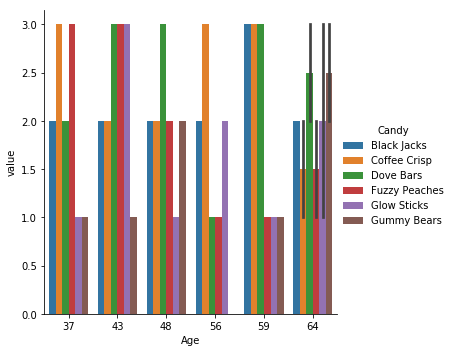

In [68]:
#visualizing the above table. I am using the tidy_df1 data frame, so that I can get the Confidence Interval.
sns.catplot(data=tidy_df1, x='Age', y='value', hue='Candy', kind='bar');

- Based on above table and bar chart, for age 37, Fuzzy Peaches and Coffee Crisp are the most favored candies, for age 43, Dove Bars, Fuzzy Peaches, Glow Sticks are the equally most favored candies, for age 48, Dove Bars, for age 56, Coffee Crisp, for age 59, Black Jacks, Coffee Crisp, Dove Bars are equally most favored, and lastly, for age 64, Dove Bars and Gummy Bears are the most favored candies. 

In [69]:
#checking the unique values for 'Region' column to clean-up.
tidy_df1['Region'].unique()

array(['Quebec', 'NY', 'California', 'Ontario', 'Texas', 'NEW YORK', 'CO'],
      dtype=object)

In [70]:
#replacing NEW YORK and NY into New York, and CO into Colorado.
tidy_df1['Region'].replace({'NY':'New York', 'NEW YORK':'New York', 'CO':'Colorado'}, inplace = True)

#grouping by 'Region' and 'Candy', and then calculating the mean of 'value' column.
region_candy = tidy_df1.groupby(['Region','Candy'])['value'].agg([('Average Value', 'mean')])
region_candy

Average Value
Region     Candy                       
California Black Jacks              2.0
           Coffee Crisp             2.0
           Dove Bars                3.0
           Fuzzy Peaches            3.0
           Glow Sticks              3.0
           Gummy Bears              1.0
Colorado   Black Jacks              2.0
           Coffee Crisp             2.0
           Dove Bars                3.0
           Fuzzy Peaches            2.0
           Glow Sticks              1.0
           Gummy Bears              2.0
New York   Black Jacks              2.5
           Coffee Crisp             2.0
           Dove Bars                2.5
           Fuzzy Peaches            1.0
           Glow Sticks              1.0
           Gummy Bears              1.5
Ontario    Black Jacks              2.0
           Coffee Crisp             3.0
           Dove Bars                2.0
           Fuzzy Peaches            3.0
           Glow Sticks              1.0
           Gummy Bears              1.0
Quebec     Black Jacks              2.0
           Coffee Crisp             3.0
           Dove Bars                1.0
           Fuzzy Peaches            1.0
           Glow Sticks              2.0
           Gummy Bears              NaN
Texas      Black Jacks              2.0
           Coffee Crisp             2.0
           Dove Bars                3.0
           Fuzzy Peaches            2.0
           Glow Sticks              3.0
           Gummy Bears              3.0

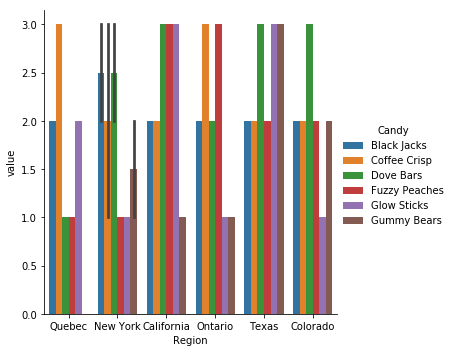

In [71]:
#visualizing the above table. I am using the tidy_df1 data frame, so that I can get the Confidence Interval.
sns.catplot(data=tidy_df1, x='Region', y='value', hue='Candy', kind='bar');

- Based on above table and bar chart, in Quebec, Coffee Crisp is the most favored candy, in New York, Black Jacks and Dove Bars, in California, Dove Bars, Fuzzy Peaches, Glow Sticks, in Ontario, Coffee Crisp and Fuzzy Peaches, in Texas, Dove Bars, Glow Sticks, Gummy Bears, and in Colorado, Dove Bars is the most favored candy, respectively.

In [72]:
#checking the unique values in 'Country' column to clean-up.
tidy_df1['Country'].unique()

array(['Canada', 'US', 'Murica', 'USA'], dtype=object)

- Murica is misspelled word of 'Murcia', which is  a city in south-eastern Spain, the capital and most populous city of the Autonomous Community of the Region of Murcia, and the seventh largest city in the country. Hence, I will replace 'Murica' into 'Spain'. Also, I will replace 'US' into 'USA' to unify the country name.

In [73]:
#replacing NEW YORK and NY into New York, and CO into Colorado.
tidy_df1['Country'].replace({'Murica':'Spain', 'US':'USA'}, inplace = True)

#grouping by 'Region' and 'Candy', and then calculating the mean of 'value' column.
country_candy = tidy_df1.groupby(['Country','Candy'])['value'].agg([('Average Value', 'mean')])                                           
country_candy

Average Value
Country Candy                       
Canada  Black Jacks             2.00
        Coffee Crisp            3.00
        Dove Bars               1.50
        Fuzzy Peaches           2.00
        Glow Sticks             1.50
        Gummy Bears             1.00
Spain   Black Jacks             2.00
        Coffee Crisp            2.00
        Dove Bars               3.00
        Fuzzy Peaches           3.00
        Glow Sticks             3.00
        Gummy Bears             1.00
USA     Black Jacks             2.25
        Coffee Crisp            2.00
        Dove Bars               2.75
        Fuzzy Peaches           1.50
        Glow Sticks             1.50
        Gummy Bears             2.00

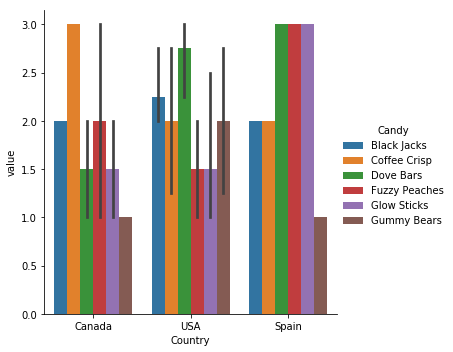

In [74]:
#visualizing the above table. I am using the tidy_df1 data frame, so that I can get the Confidence Interval.
sns.catplot(data=tidy_df1, x='Country', y='value', hue='Candy', kind='bar');

- Based on above table and bar chart, in Canada, Coffee Crisp is the most favored candy, in USA, Dove Bars is the most favored candy, and in Spain, Dove Bras, Fuzzy Peaches, Glow Sticks are equally the most favored candies.

## 2. Student test data analysis

In [75]:
df2

,Name,Test1,Test2,Test3,Test4
0,Reggie Miller,97.0,80,87.0,91
1,Dan Bonner,76.0,68,80.0,81
2,Steve Smith,84.0,75,NaN,86
3,Charles Barkey,NaN,89,NaN,76
4,Kenny Smith,80.0,81,79.0,85


In [76]:
#filling NaN values with 0, as the students did not take the test, or missing.
df2.fillna(value='0', inplace=True)
df2

,Name,Test1,Test2,Test3,Test4
0,Reggie Miller,97,80,87,91
1,Dan Bonner,76,68,80,81
2,Steve Smith,84,75,0,86
3,Charles Barkey,0,89,0,76
4,Kenny Smith,80,81,79,85


In [77]:
#checking the data types.
df2.dtypes

Name     object
Test1    object
Test2     int64
Test3    object
Test4     int64
dtype: object

In [78]:
#tidying the data frame by converting it from wide format to long format.
tidy_df2 = df2.melt(id_vars = ['Name'],
                   value_vars = ['Test1', 'Test2', 
                                 'Test3', 'Test4'])
tidy_df2.head(7)

,Name,variable,value
0,Reggie Miller,Test1,97
1,Dan Bonner,Test1,76
2,Steve Smith,Test1,84
3,Charles Barkey,Test1,0
4,Kenny Smith,Test1,80
5,Reggie Miller,Test2,80
6,Dan Bonner,Test2,68


In [79]:
#renaming the 'variable' column into 'Test' and 'value' column into 'Grade'.
tidy_df2.rename(columns={'variable':'Test', 'value':'Grade'}, inplace = True)

#converting the 'Grade' column into numeric data type for mathematic calculation.
tidy_df2['Grade'] = pd.to_numeric(tidy_df2['Grade'])


#sorting by 'Name'
tidy_df2 = tidy_df2.sort_values('Name')
tidy_df2.head(7)

,Name,Test,Grade
3,Charles Barkey,Test1,0.0
13,Charles Barkey,Test3,0.0
8,Charles Barkey,Test2,89.0
18,Charles Barkey,Test4,76.0
1,Dan Bonner,Test1,76.0
16,Dan Bonner,Test4,81.0
6,Dan Bonner,Test2,68.0


In [80]:
#checking the data type.
tidy_df2.dtypes

Name      object
Test      object
Grade    float64
dtype: object

In [81]:
#grouping by 'Name' and then calculate the mean, max, min of 'Grade', respectively. 
grouped2 = tidy_df2.groupby(['Name'])['Grade'].agg([('Average Test Grade', 'mean'),('Highest Grade', 'max'),
                                         ('Lowest Grade','min')])
grouped2

,Average Test Grade,Highest Grade,Lowest Grade
Name,,,
Charles Barkey,41.25,89.0,0.0
Dan Bonner,76.25,81.0,68.0
Kenny Smith,81.25,85.0,79.0
Reggie Miller,88.75,97.0,80.0
Steve Smith,61.25,86.0,0.0


In [82]:
# creating 'Range of Grade' column by subtracting the 'Lowest Grade' column from the 'Highest Grade' column.
grouped2['Range of Grade'] = grouped2['Highest Grade']- grouped2['Lowest Grade']
grouped2

,Average Test Grade,Highest Grade,Lowest Grade,Range of Grade
Name,,,,
Charles Barkey,41.25,89.0,0.0,89.0
Dan Bonner,76.25,81.0,68.0,13.0
Kenny Smith,81.25,85.0,79.0,6.0
Reggie Miller,88.75,97.0,80.0,17.0
Steve Smith,61.25,86.0,0.0,86.0


In [83]:
# converting the 'Name' index into column
grouped2 = grouped2.reset_index(level=['Name'])
grouped2

,Name,Average Test Grade,Highest Grade,Lowest Grade,Range of Grade
0,Charles Barkey,41.25,89.0,0.0,89.0
1,Dan Bonner,76.25,81.0,68.0,13.0
2,Kenny Smith,81.25,85.0,79.0,6.0
3,Reggie Miller,88.75,97.0,80.0,17.0
4,Steve Smith,61.25,86.0,0.0,86.0


In [84]:
# checking the columns.
grouped2.columns

Index(['Name', 'Average Test Grade', 'Highest Grade', 'Lowest Grade',
       'Range of Grade'],
      dtype='object')

In [85]:
# highest average test grade
grouped2['Average Test Grade'].max()

88.75

In [86]:
# finding the student name with highest average test grade, 88.75
grouped2.loc[grouped2['Average Test Grade'] == 88.75].Name

3    Reggie Miller
Name: Name, dtype: object

- Answer 1. Reggie Miller had the highest average test grade.

In [87]:
# greatest range of test grade
grouped2['Range of Grade'].max()

89.0

In [88]:
# finding the student name with the greates range of test grade, 89.0
grouped2.loc[grouped2['Range of Grade'] == 89.0, 'Name']

0    Charles Barkey
Name: Name, dtype: object

- Answer 2.Charles Barkey had the greatest range of test grade.

In [89]:
# highest grade
tidy_df2['Grade'].max()

97.0

In [90]:
# checking the tidy_df2 data frame again.
tidy_df2

,Name,Test,Grade
3,Charles Barkey,Test1,0.0
13,Charles Barkey,Test3,0.0
8,Charles Barkey,Test2,89.0
18,Charles Barkey,Test4,76.0
1,Dan Bonner,Test1,76.0
16,Dan Bonner,Test4,81.0
6,Dan Bonner,Test2,68.0
11,Dan Bonner,Test3,80.0
9,Kenny Smith,Test2,81.0
14,Kenny Smith,Test3,79.0


In [91]:
# finding the test with the highest grade, 97.0
tidy_df2.loc[tidy_df2['Grade'] == 97.0]

,Name,Test,Grade
0,Reggie Miller,Test1,97.0


- Answer 3. Test1 had the highest grade.

## 3. Student enrollment data analysis

In [92]:
df3

,Unique ID of the institution,Level of student,American Indian or Alaska Native,Asian,Black or African American,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,White,Two or more races,Race/ethnicity unknown,Nonresident alien
0,100654,Undergraduate,11,12,4742,36,10,137,210,11,38
1,100654,Graduate,4,11,961,7,1,151,14,3,33
2,100663,Undergraduate,36,743,3497,429,4,7515,522,198,364
3,100663,Graduate,26,471,1550,289,11,6437,269,176,659
4,100690,Undergraduate,0,2,195,44,1,66,0,123,0
5,100690,Graduate,2,1,152,43,4,93,0,142,0
6,100706,Undergraduate,90,304,813,313,3,5055,129,595,217
7,100706,Graduate,23,71,202,64,0,1518,20,115,365


In [93]:
#tidying the data frame by converting it from wide format to long format.
tidy_df3 = df3.melt(id_vars = ['Unique ID of the institution', 'Level of student'],
                   value_vars = ['American Indian or Alaska Native', 'Asian',
       'Black or African American', 'Hispanic or Latino',
       'Native Hawaiian or Other Pacific Islander', 'White',
       'Two or more races', 'Race/ethnicity unknown', 'Nonresident alien'])
tidy_df3.head()

,Unique ID of the institution,Level of student,variable,value
0,100654,Undergraduate,American Indian or Alaska Native,11
1,100654,Graduate,American Indian or Alaska Native,4
2,100663,Undergraduate,American Indian or Alaska Native,36
3,100663,Graduate,American Indian or Alaska Native,26
4,100690,Undergraduate,American Indian or Alaska Native,0


In [94]:
#renaming the 'variable' column into 'Race/Ethnicity' and 'value' column into 'Number of Students', and so on to simplify.
tidy_df3.rename(columns={'variable':'Race/Ethnicity', 'value':'Enrollment',
                        'Unique ID of the institution':'Institution ID',
                        'Level of student':'Level'}, inplace = True)
tidy_df3.head()

,Institution ID,Level,Race/Ethnicity,Enrollment
0,100654,Undergraduate,American Indian or Alaska Native,11
1,100654,Graduate,American Indian or Alaska Native,4
2,100663,Undergraduate,American Indian or Alaska Native,36
3,100663,Graduate,American Indian or Alaska Native,26
4,100690,Undergraduate,American Indian or Alaska Native,0


In [95]:
#checking the data types.
tidy_df3.dtypes

Institution ID     int64
Level             object
Race/Ethnicity    object
Enrollment         int64
dtype: object

In [96]:
# creating data frame that has total number of students enrolled for each level, each institution, and each race/ethnicity.
level_grouped1 = tidy_df3.groupby(['Level', 'Institution ID', 'Race/Ethnicity'])['Enrollment'].agg('sum').to_frame()
level_grouped1

Enrollment
Level         Institution ID Race/Ethnicity                                       
Graduate      100654         American Indian or Alaska Native                    4
                             Asian                                              11
                             Black or African American                         961
                             Hispanic or Latino                                  7
                             Native Hawaiian or Other Pacific Islander           1
                             Nonresident alien                                  33
                             Race/ethnicity unknown                              3
                             Two or more races                                  14
                             White                                             151
              100663         American Indian or Alaska Native                   26
                             Asian                                             471
                             Black or African American                        1550
                             Hispanic or Latino                                289
                             Native Hawaiian or Other Pacific Islander          11
                             Nonresident alien                                 659
                             Race/ethnicity unknown                            176
                             Two or more races                                 269
                             White                                            6437
              100690         American Indian or Alaska Native                    2
                             Asian                                               1
                             Black or African American                         152
                             Hispanic or Latino                                 43
                             Native Hawaiian or Other Pacific Islander           4
                             Nonresident alien                                   0
                             Race/ethnicity unknown                            142
                             Two or more races                                   0
                             White                                              93
              100706         American Indian or Alaska Native                   23
                             Asian                                              71
                             Black or African American                         202
...                                                                            ...
Undergraduate 100654         Race/ethnicity unknown                             11
                             Two or more races                                 210
                             White                                             137
              100663         American Indian or Alaska Native                   36
                             Asian                                             743
                             Black or African American                        3497
                             Hispanic or Latino                                429
                             Native Hawaiian or Other Pacific Islander           4
                             Nonresident alien                                 364
                             Race/ethnicity unknown                            198
                             Two or more races                                 522
                             White                                            7515
              100690         American Indian or Alaska Native                    0
                             Asian                                               2
                             Black or African American                         195
                             Hispanic or Latino                                 44
     

In [97]:
# creating data frame that includes total enrollment in each level, institution.
level_grouped2 = tidy_df3.groupby(['Level', 'Institution ID'])['Enrollment'].agg([('Total', 'sum')])
level_grouped2

Total
Level         Institution ID       
Graduate      100654           1185
              100663           9888
              100690            437
              100706           2378
Undergraduate 100654           5207
              100663          13308
              100690            431
              100706           7519

In [98]:
#merging above two data frames
merged1 = pd.merge(level_grouped1, level_grouped2, left_on=['Level', 'Institution ID'], right_index=True).reset_index()
merged1.head(10)

,level_0,level_1,Race/Ethnicity,Enrollment,Total
0,Graduate,100654,American Indian or Alaska Native,4,1185
1,Graduate,100654,Asian,11,1185
2,Graduate,100654,Black or African American,961,1185
3,Graduate,100654,Hispanic or Latino,7,1185
4,Graduate,100654,Native Hawaiian or Other Pacific Islander,1,1185
5,Graduate,100654,Nonresident alien,33,1185
6,Graduate,100654,Race/ethnicity unknown,3,1185
7,Graduate,100654,Two or more races,14,1185
8,Graduate,100654,White,151,1185
9,Graduate,100663,American Indian or Alaska Native,26,9888


In [99]:
#renaming the first two columns
merged1.rename(columns={'level_0':'Level', 'level_1':'Institution ID'}, inplace=True)
merged1.head(15)

,Level,Institution ID,Race/Ethnicity,Enrollment,Total
0,Graduate,100654,American Indian or Alaska Native,4,1185
1,Graduate,100654,Asian,11,1185
2,Graduate,100654,Black or African American,961,1185
3,Graduate,100654,Hispanic or Latino,7,1185
4,Graduate,100654,Native Hawaiian or Other Pacific Islander,1,1185
5,Graduate,100654,Nonresident alien,33,1185
6,Graduate,100654,Race/ethnicity unknown,3,1185
7,Graduate,100654,Two or more races,14,1185
8,Graduate,100654,White,151,1185
9,Graduate,100663,American Indian or Alaska Native,26,9888


In [100]:
#creating the percentage column
merged1['pct'] = merged1['Enrollment'] / merged1['Total'] * 100

#sorting by 'Institution ID', 'Level', 'pct'.
merged1 = merged1.sort_values(['Institution ID', 'Level', 'pct'], ascending=False)
merged1

,Level,Institution ID,Race/Ethnicity,Enrollment,Total,pct
71,Undergraduate,100706,White,5055,7519,67.229685
65,Undergraduate,100706,Black or African American,813,7519,10.812608
69,Undergraduate,100706,Race/ethnicity unknown,595,7519,7.913286
66,Undergraduate,100706,Hispanic or Latino,313,7519,4.162788
64,Undergraduate,100706,Asian,304,7519,4.043091
68,Undergraduate,100706,Nonresident alien,217,7519,2.886022
70,Undergraduate,100706,Two or more races,129,7519,1.715654
63,Undergraduate,100706,American Indian or Alaska Native,90,7519,1.196968
67,Undergraduate,100706,Native Hawaiian or Other Pacific Islander,3,7519,0.039899
35,Graduate,100706,White,1518,2378,63.835156


In [101]:
#checking column names
merged1.columns

Index(['Level', 'Institution ID', 'Race/Ethnicity', 'Enrollment', 'Total',
       'pct'],
      dtype='object')

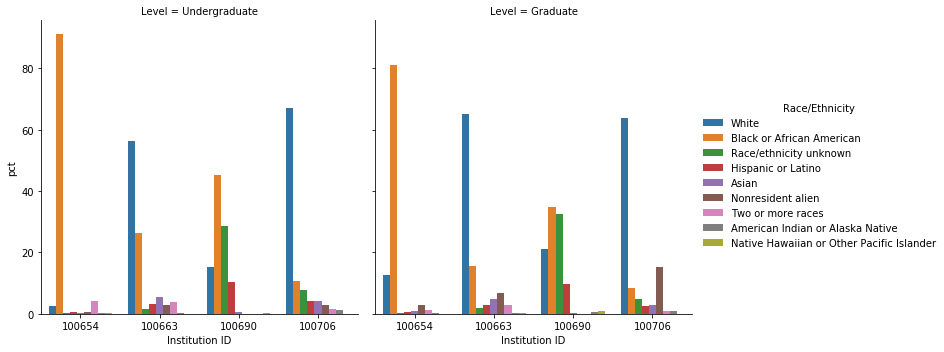

In [102]:
#visualizing the above table
sns.catplot(data=merged1, kind='bar', x='Institution ID', y='pct', hue='Race/Ethnicity',col='Level');

- Based on the above table and chart, Institution 100654 has the most Black or African American student enrollment percentage in both levels of Graduate and Undergraduate, and the institution 100663 has the most White student percentage in Graduate level, the institution 100706 has the most White student percentage in Undergraduate level.
I used Qi Sun't student enrollment data, and the question she asked "we can analyze the enrollment on different ethnicity by the level, or compare different institutions' enrollment by ethnicity" can be answered by above table and the chart.